In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline
sns.set()

In [5]:
planets = sns.load_dataset('planets')

In [6]:
type(planets)

pandas.core.frame.DataFrame

In [7]:
planets.shape

(1035, 6)

In [8]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [10]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [11]:
planets.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [12]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [13]:
planets = planets[planets.distance.notna()]
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          808 non-null    object 
 1   number          808 non-null    int64  
 2   orbital_period  776 non-null    float64
 3   mass            498 non-null    float64
 4   distance        808 non-null    float64
 5   year            808 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 44.2+ KB


In [14]:
planets.mass.isnull().sum()

310

In [15]:
planets.mass.isnull().sum() / planets.shape[0] * 100

38.366336633663366

In [16]:
planets.orbital_period.isnull().sum() / planets.shape[0] *100

3.9603960396039604

<AxesSubplot:>

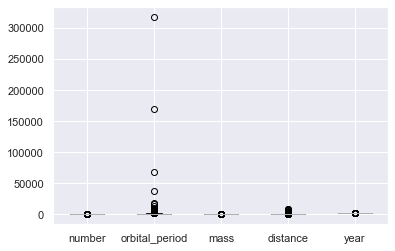

In [17]:
planets.boxplot()

In [18]:
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

<AxesSubplot:>

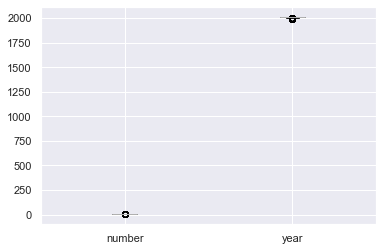

In [19]:
planets.boxplot(['number', 'year'])

In [20]:
planets.nunique()

method              9
number              7
orbital_period    773
mass              370
distance          552
year               21
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='orbital_period', ylabel='mass'>

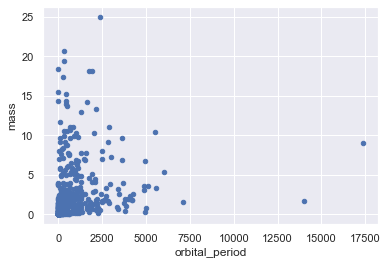

In [21]:
planets.plot.scatter(2,3)

<AxesSubplot:xlabel='year', ylabel='mass'>

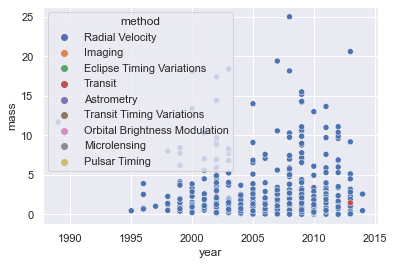

In [23]:
sns.scatterplot(data=planets, x='year', y='mass', hue='method')


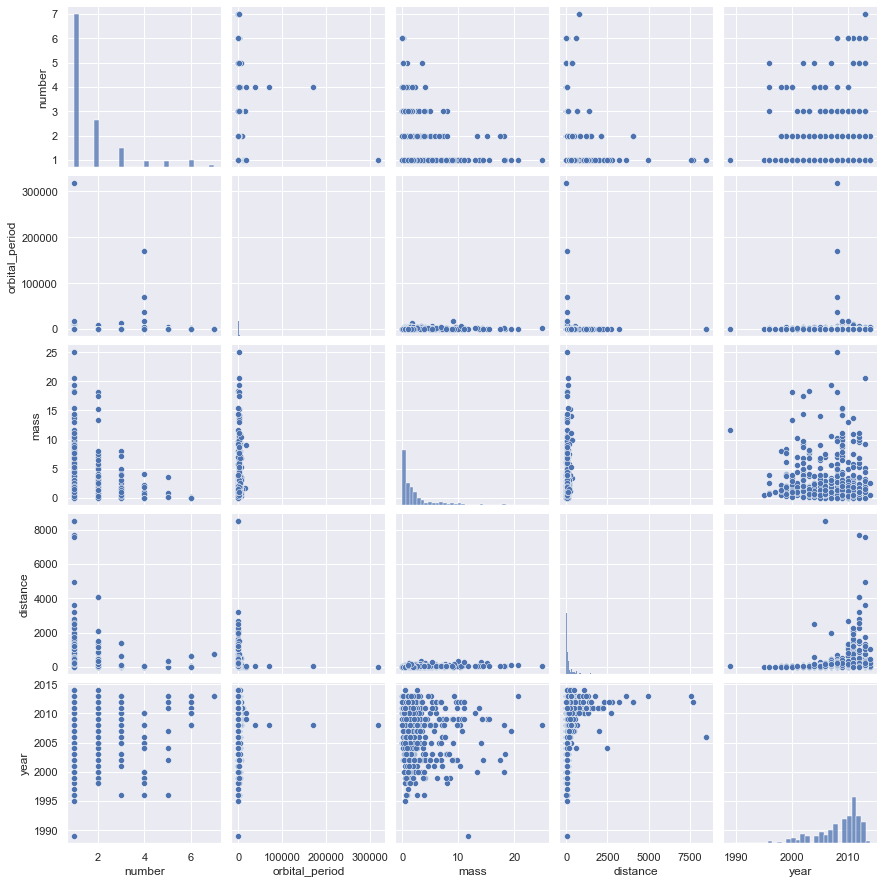

In [32]:
sns.pairplot(planets)

Some insights and findings I found in this dataset has to do with how far back we were able to measure these planets. It seems as though even before the 1990's we have had access to images or imaging technologies to see planets.

what I found interesting was the fact that the orbital period was measured for about 97% of these plants with a roughly 3% missing data points for this category it is astonishing that scientists were able to measure the time it takes the planet to orbit the sun or whatever it is orbiting.

Based on the pair plots above there seems to be a slight correlation with dstance and year and I want to believe it's due to technology advances. The later in years it got the further away the planets were therefore it makes me think that these planets are not just casually appearring but we are just finally able to see them.

<AxesSubplot:xlabel='year', ylabel='distance'>

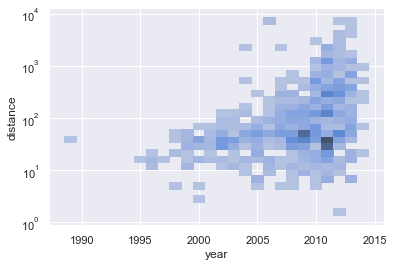

In [26]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),)

<AxesSubplot:xlabel='year', ylabel='distance'>

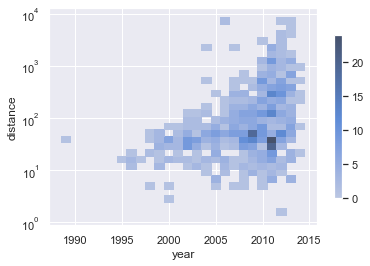

In [27]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)